In [3]:
# imports
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np
from pandas.tools.plotting import scatter_matrix

%matplotlib inline

In [6]:
# set up folder link and files
folder_link = 'C:/Users/Michael/projects/kaggle/rossman/'

train_file = folder_link + 'train.csv'
test_file = folder_link + 'test.csv'
submission_file = folder_link + 'predictions_linreg.csv'

In [7]:
# set up dataframes
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

C:\Users\Michael\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [10]:
# list out columns
list(train.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

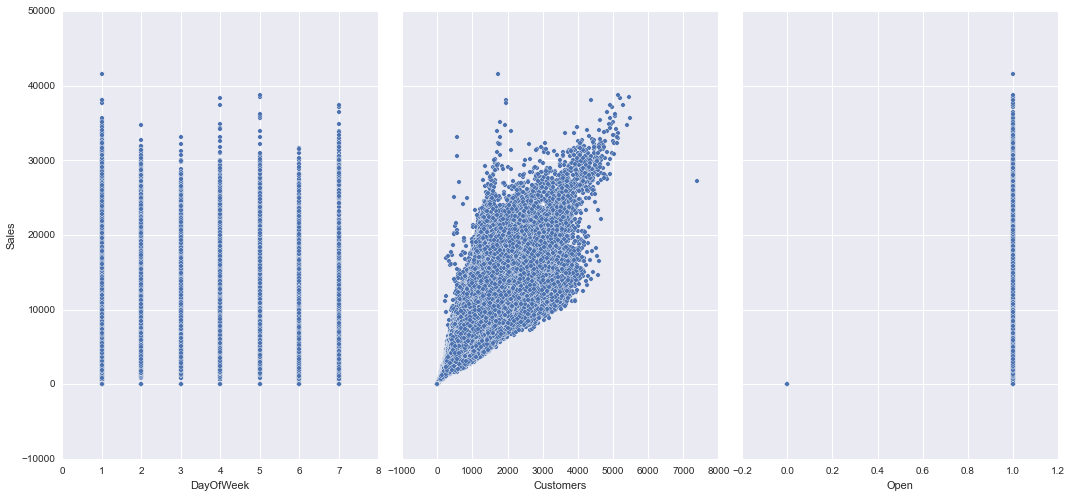

In [12]:
# visualize the relationship using scatterplots
sns.pairplot(train, x_vars=['DayOfWeek','Customers','Open'], y_vars='Sales', size=7, aspect=0.7)

In [14]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [15]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [17]:
train.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
dtype: int64

In [25]:
train.StateHoliday = train.StateHoliday.map({'0':0,0:0,'a':1,'b':2,'c':3})

In [26]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday      int64
SchoolHoliday     int64
dtype: object

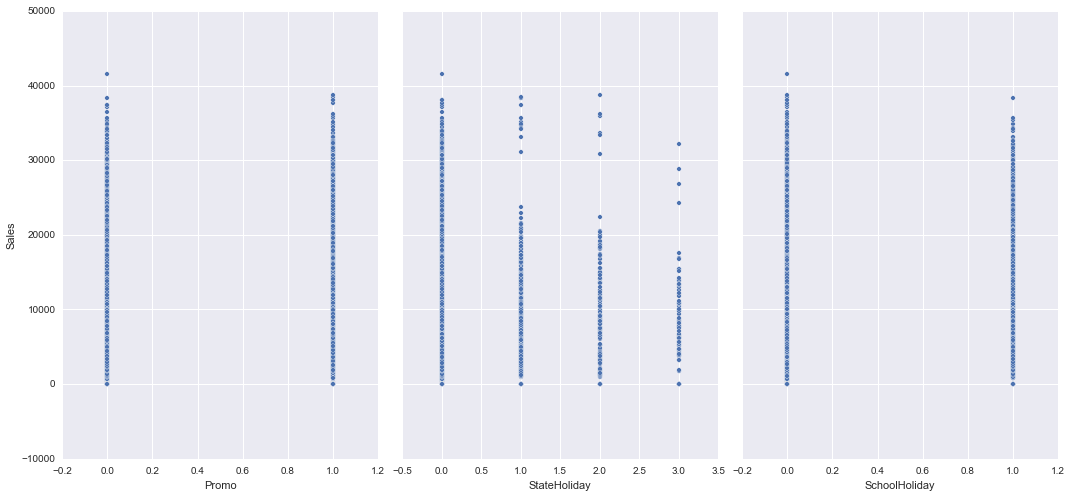

In [27]:
# visualize the relationship using scatterplots
sns.pairplot(train, x_vars=['Promo','StateHoliday','SchoolHoliday'], y_vars='Sales', size=7, aspect=0.7)

In [76]:
# create X and y
feature_cols = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']
X = train[feature_cols]
y = train.Sales

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X,y)

# print the coefficients
print lm1.intercept_
print lm1.coef_

809.523516019
[ -128.81173405  5646.95717598  2073.50697413  -552.35772792   143.43783635]


In [77]:
# pair the feature names with coefficients
zip(feature_cols, lm1.coef_)

[('DayOfWeek', -128.81173404621995),
 ('Open', 5646.95717597773),
 ('Promo', 2073.5069741281695),
 ('StateHoliday', -552.35772791808404),
 ('SchoolHoliday', 143.43783634861347)]

In [78]:
list(test.columns)

['Id',
 'Store',
 'DayOfWeek',
 'Date',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [79]:
test.loc[test.Open.isnull(),'Open'] = 1 
test.loc[test.StateHoliday.isnull(),'StateHoliday'] = 0

In [81]:
test1 = test[['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']]

In [82]:
test1.StateHoliday.value_counts()
test1.StateHoliday = test1.StateHoliday.astype(float)

In [83]:
y_pred = lm1.predict(test1)

In [87]:
submit = pd.DataFrame({'Id':test['Id'],'Sales':y_pred})

In [89]:
submit.describe()

,Id,Sales
count,41088.000000,41088.000000
mean,20544.500000,6003.458454
std,11861.228267,2724.476095
min,1.000000,-515.704616
25%,10272.750000,5683.610288
50%,20544.500000,6213.483326
75%,30816.250000,8158.178566
max,41088.000000,8544.613768


In [92]:
submit.to_csv(submission_file,index=False)